In [1]:
import torch
import matplotlib.pyplot as plt
plt.rc('font', size=16)

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

# 1. Data

more on Pytorch **DATASETS** & **DATALOADERS** : https://pytorch.org/tutorials/beginner/basics/data_tutorial.html

## 1.1 load dataset

### - build-in datasets in pytorch : [torchvision.datasets](https://pytorch.org/vision/stable/datasets.html)

### - dataset transforms : [torchvision.transforms](https://pytorch.org/vision/stable/transforms.html)

`ToTensor` converts the image data from PIL type to 32-bit floating point tensors. It divides all numbers by 255 so that all pixel values are between 0 and 1.

In [3]:
import torch.nn as nn
from torchvision import datasets, transforms

In [4]:
fmnist_train = datasets.FashionMNIST(
    root="../../data", train=True, transform=transforms.ToTensor(), download=True)
fmnist_test = datasets.FashionMNIST(
    root="../../data", train=False, transform=transforms.ToTensor(), download=True)

0it [00:00, ?it/s]

Extracting ../../data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ../../data/FashionMNIST/raw


0it [00:00, ?it/s]

Extracting ../../data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ../../data/FashionMNIST/raw


0it [00:00, ?it/s]

Extracting ../../data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ../../data/FashionMNIST/raw


0it [00:00, ?it/s]

Extracting ../../data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ../../data/FashionMNIST/raw
Processing...
Done!


/Users/hhg/opt/anaconda3/lib/python3.7/site-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /Users/distiller/project/conda/conda-bld/pytorch_1603729051302/work/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [5]:
fmnist_train

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: ../../data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [6]:
fmnist_test

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: ../../data
    Split: Test
    StandardTransform
Transform: ToTensor()

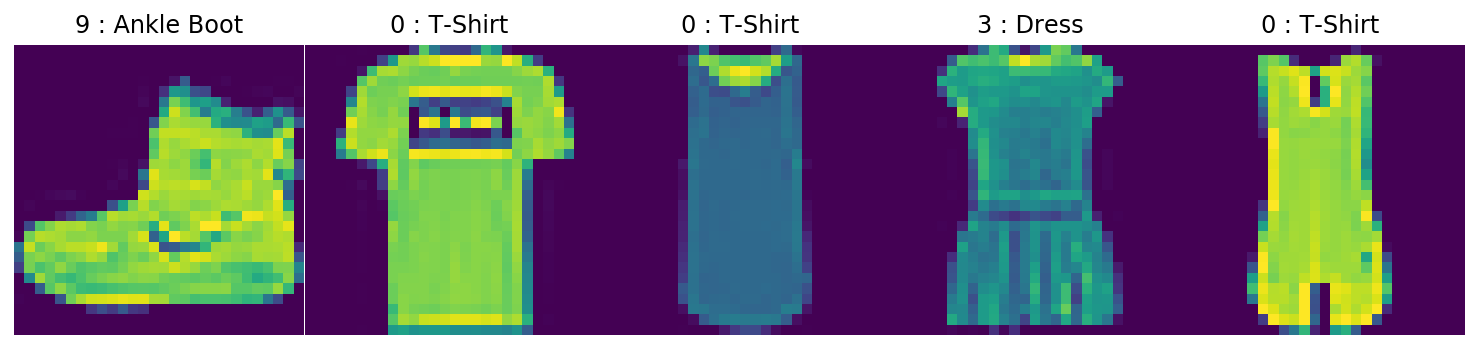

In [7]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

fig, axes = plt.subplots(1, 5, figsize=(13, 4))
plt.subplots_adjust(hspace=0.001, wspace=0.001)

for i in range(5):
    image, label = fmnist_train.__getitem__(i)
    axes[i].imshow(image.squeeze().numpy())
    axes[i].set_title(f'{label} : {labels_map[label]}')
    axes[i].axis('off')

In [8]:
ID = 10
image, label = fmnist_train.__getitem__(ID)
image.shape

torch.Size([1, 28, 28])

In [9]:
image.squeeze().shape # squeeze : removes all dimensions of size 1 (a,1,b,1) -> (a,b)

torch.Size([28, 28])

In [10]:
type(image.squeeze().numpy())

numpy.ndarray

## 1.2 DataLoader

In [11]:
from torch.utils.data import DataLoader

In [12]:
batch_size = 100

train_loader = DataLoader(fmnist_train, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(fmnist_test, batch_size=batch_size, shuffle=True)

In [13]:
# Iterate through DataLoader
train_images, train_labels = next(iter(train_loader))
print(f"Feature batch shape: {train_images.shape}")
print(f"Labels batch shape: {train_labels.shape}")

Feature batch shape: torch.Size([100, 1, 28, 28])
Labels batch shape: torch.Size([100])


In [14]:
print('Number of iterations per epoch', len(train_loader)) # 60000 // batch_size + 1

Number of iterations per epoch 600


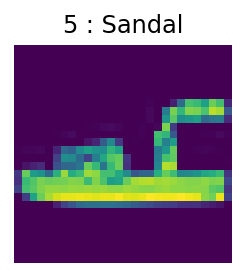

In [15]:
img = train_images[0].squeeze().numpy() # train_images[0].shape = (1, 28, 28)
                                        # train_images[0].squeeze().shape = (28,28)
                                        # tensor.numpy() -> transform pytorch tensor to numpy array
label = int(train_labels[0].numpy())

# plot
plt.figure(figsize=(2, 2))
plt.imshow(img)
plt.title(f'{label} : {labels_map[label]}')
plt.axis('off')
plt.show()

# 2. Model

### [torch.nn](https://pytorch.org/tutorials/beginner/nn_tutorial.html) modules -- a base class used to develop all neural network models

In [16]:
import torch.nn as nn

In [17]:
input_size = 28*28
output_size = 10
hidden_size = 256

## --- Model 1 (d2l §3.5 ~ §3.7) -------------------------
## ------ Softmax Regression (single layer network) ------
## -------------------------------------------------------

class SoftmaxRegressionNet(nn.Module):
    def __init__(self, input_size, output_size):
        super().__init__()
        self.input_size = input_size
        self.linear = nn.Linear(input_size, output_size)
    
    def forward(self, x):
        o = self.linear(x)              # o : output logits (Note! softmax activation not applied yet.)
        return o

## --- Model 2 (d2l §4.2 ~ §4.3) -------------------------
## ------ MLP with 1 hidden layer (2 layer network) ------ 
## -------------------------------------------------------

class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        self.input_size = input_size
        
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):            
        o = self.linear1(x)
        o = self.relu(o)
        o = self.linear2(o)
        return o

In [18]:
#model = SoftmaxRegressionNet(input_size, output_size)
model = MLP(input_size, hidden_size, output_size)
model.to(device)

MLP(
  (linear1): Linear(in_features=784, out_features=256, bias=True)
  (relu): ReLU()
  (linear2): Linear(in_features=256, out_features=10, bias=True)
)

In [19]:
# count model parameters
print('TOTAL  :', sum(param.numel() for param in model.parameters() if param.requires_grad))

TOTAL  : 203530


# 3. Loss

In [20]:
criterion = nn.CrossEntropyLoss()

Usage : `loss = criterion(Y_pred, Y)`

**Careful!** <br>
`nn.CrossEntropyLoss` applies: ``nn.LogSoftmax`` and ``nn.NLLLoss`` (negative log likelihood loss). <br>
So don't apply softmax in the forward loop. <br>
``Y`` is class (digit) labels, not one-hot!   <br>
``Y_pred`` has raw scores (logits), no Softmax!

# 4. Optimization

In [21]:
import torch.optim as optim

In [22]:
learning_rate = 0.1
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# 5. Training Loop

### loss.backward() : calculate dloss/dw_i 

### optimizer.step()  : update network parameters (w_i)

### optimizer.zero_grad() 
Whenever `loss.backward()` is called, it'll write the gradients and accumulate them in the w_i.grad attribute. <br>
e.g. try to print out `model.linear1.weight.grad` <br>
So we need to call `optimizer.zero_grad()` to zero gradient again and again for every iteration.

In [23]:
num_epochs = 10

# training loop
n_total_steps = len(train_loader)

train_loss = []
train_acc  = []
for epoch in range(num_epochs):
    running_loss = 0.
    running_corrects = 0
    for i, (images, labels) in enumerate(train_loader):
        # reshape images with torch.view (size -1 is inferred from other dimensions) and push it to the device
        # 100, 1, 28, 28
        # 100, 784 (784-> input_size)
        images = images.reshape(-1, 28*28).to(device) 
        labels = labels.to(device)
        
        # forward
        outputs = model(images)
        
        # loss
        loss = criterion(outputs, labels) # predicted outputs v.s. actual labels
        
        # backwards
        optimizer.zero_grad()  # zero gradient
        loss.backward()        # loss.backward would calculate dloss/dw_i  
        optimizer.step()       # update network parameters (w_i)
        
        # compute statistics (avg. loss, accuracy)
        running_loss += loss.item() * labels.size(0)
        _, predictions = torch.max(outputs, 1)
        running_corrects += torch.sum(predictions == labels.data)
        
        if (i+1)%200 == 0: # every 200 steps, print something
            print(f'epoch {epoch+1}/{num_epochs}, step {i+1}/{n_total_steps}, loss={loss.item():.4f}')
    
    epoch_loss = running_loss / len(fmnist_train)            ; train_loss.append(epoch_loss)
    epoch_acc  = running_corrects / len(fmnist_train) * 100. ; train_acc.append(epoch_acc)
    print(f'--- End epoch {epoch+1} training, accuracy = {epoch_acc:.2f}%, avgLoss = {epoch_loss:.4f}')

epoch 1/10, step 200/600, loss=0.6474
epoch 1/10, step 400/600, loss=0.4925
epoch 1/10, step 600/600, loss=0.5004
--- End epoch 1 training, accuracy = 76.63%, avgLoss = 0.6824
epoch 2/10, step 200/600, loss=0.6122
epoch 2/10, step 400/600, loss=0.3900
epoch 2/10, step 600/600, loss=0.4404
--- End epoch 2 training, accuracy = 83.29%, avgLoss = 0.4716
epoch 3/10, step 200/600, loss=0.5268
epoch 3/10, step 400/600, loss=0.5635
epoch 3/10, step 600/600, loss=0.4728
--- End epoch 3 training, accuracy = 85.29%, avgLoss = 0.4174
epoch 4/10, step 200/600, loss=0.3626
epoch 4/10, step 400/600, loss=0.4187
epoch 4/10, step 600/600, loss=0.3936
--- End epoch 4 training, accuracy = 86.15%, avgLoss = 0.3900
epoch 5/10, step 200/600, loss=0.3520
epoch 5/10, step 400/600, loss=0.4255
epoch 5/10, step 600/600, loss=0.5084
--- End epoch 5 training, accuracy = 86.76%, avgLoss = 0.3699
epoch 6/10, step 200/600, loss=0.4321
epoch 6/10, step 400/600, loss=0.3819
epoch 6/10, step 600/600, loss=0.4184
--- En

In [24]:
# test and evaluation
with torch.no_grad():
    
    n_correct = 0
    n_samples = 0
    
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        
        # compute statistics (avg. loss, accuracy)
        _, predictions = torch.max(outputs, 1)
        n_correct += torch.sum(predictions == labels.data) # n_correct += (predictions == labels).sum().item()

    test_acc = 100.*n_correct/len(test_loader.dataset)
    print(f'accuracy = {test_acc}%')

accuracy = 87.0%


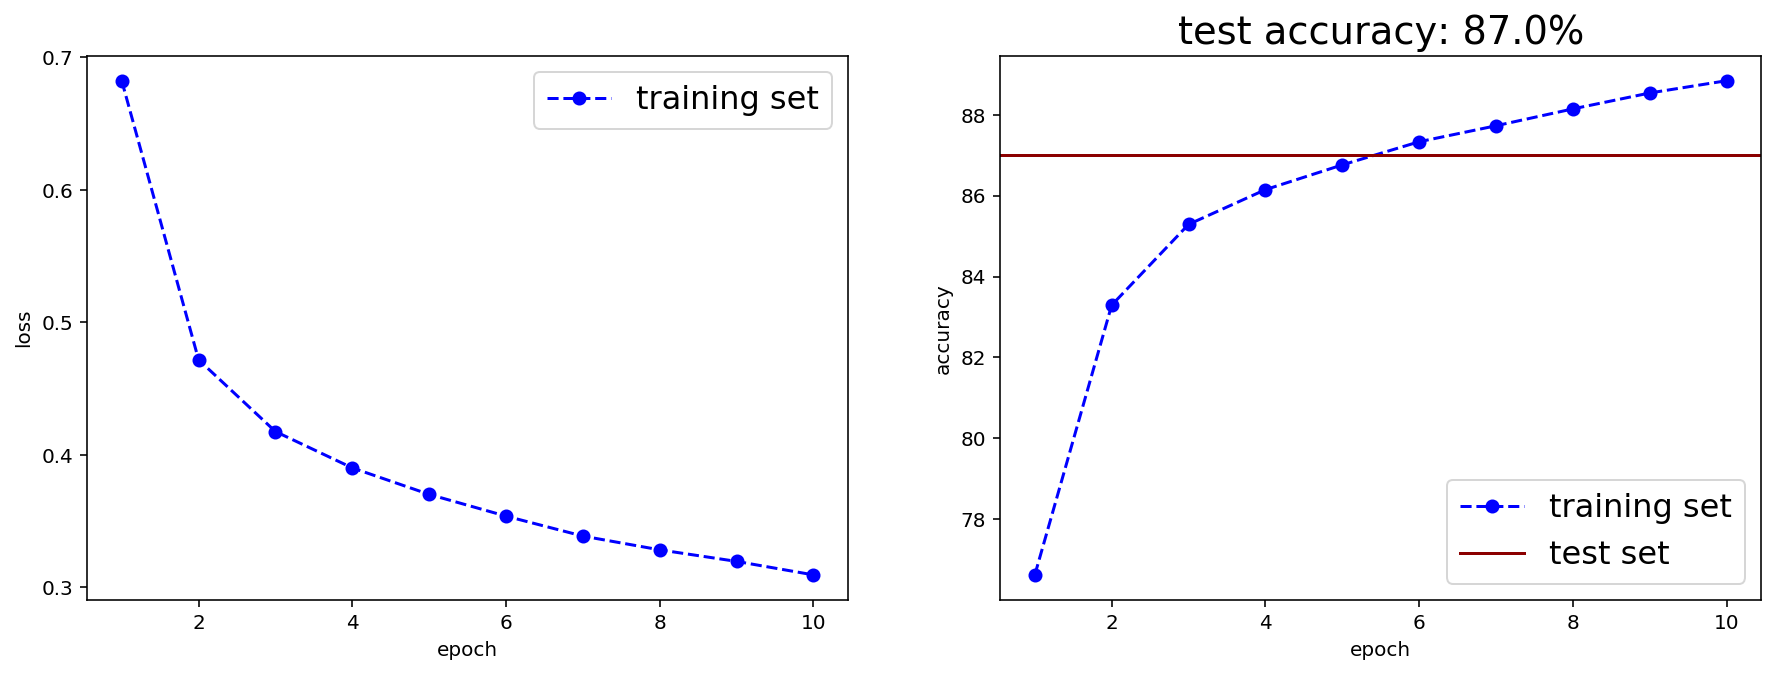

In [25]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
plt.rc('font', size=16)

ax[0].plot(range(1,11), train_loss, 'o--', label='training set', color='b')
ax[1].plot(range(1,11), train_acc, 'o--', label='training set', color='b')


ax[1].axhline(test_acc , color='darkred', label='test set')

ax[1].set_title(f'test accuracy: {test_acc:.3}%')

ax[0].set_ylabel('loss')
ax[1].set_ylabel('accuracy')

for i in range(2):
    ax[i].set_xlabel('epoch')
    ax[i].legend(loc='best')

# ------------ End ------------

## Nice tutorials for learning pytorch

- Introduction to PyTorch youtube series https://pytorch.org/tutorials/beginner/introyt.html
- https://www.youtube.com/watch?v=EMXfZB8FVUA&list=PLqnslRFeH2UrcDBWF5mfPGpqQDSta6VK4